<a href="https://colab.research.google.com/github/kapeeshvarma/Play-Store-App-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Play Store App Review Analysis**

Over the years, Google Play Store has evolved into a one-stop platform for downloading apps from different categories. It is the central hub for millions of apps for your smartphone. In this project, we will do a comprehensive analysis of the Play Store App by comparing over ten thousand apps and reviews across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.

The data used for this project consists of two files:


*   Play Store Data.csv : This dataset contains all the details of the applications on Google Play Store. There are 13 features for each app.
*   User Reviews.csv : It contains reviews for each app along with Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.



##Importing Data and Modules

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Import the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [4]:
# Read in the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Play Store App Review Analysis - Kapeesh Varma/Play Store Data.csv')

# Print the summary of the dataframe
print(data.info())

# Print the total number of apps
print('Total number of apps in the dataset = ', len(data))

# Have a look at a random sample of the dataframe
data.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None
Total number of apps in the dataset =  10841


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3448,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,PERSONALIZATION,4.2,115773,Varies with device,"10,000,000+",Free,0,Everyone,Personalization,"May 22, 2018",Varies with device,4.1 and up
4953,Ad Detector,TOOLS,3.8,208,730k,"50,000+",Free,0,Everyone,Tools,"July 28, 2014",1.0,2.3 and up
1404,Calorie Counter - MyFitnessPal,HEALTH_AND_FITNESS,4.6,1873520,Varies with device,"50,000,000+",Free,0,Everyone,Health & Fitness,"July 31, 2018",Varies with device,Varies with device
6759,BSc Ag Entrance Preparation,FAMILY,4.4,138,6.2M,"10,000+",Free,0,Everyone,Education,"May 31, 2018",3.7,4.1 and up
7635,Feeder.co,NEWS_AND_MAGAZINES,3.2,77,11M,"5,000+",Free,0,Everyone,News & Magazines,"March 12, 2018",2.2.7,4.2 and up
2238,Video Editor,FAMILY,4.1,159619,23M,"5,000,000+",Free,0,Everyone,Video Players & Editors;Creativity,"July 17, 2018",6.14.091,4.3 and up
6499,Radio BN,FAMILY,NaN,53,4.2M,"5,000+",Free,0,Everyone,Entertainment,"January 12, 2018",1.0.3,4.4 and up
1192,Simple Recipes,FOOD_AND_DRINK,4.7,3803,15M,"500,000+",Free,0,Everyone,Food & Drink,"February 22, 2018",1.6,4.0 and up
4876,AB Blast Match 3,FAMILY,4.3,111,48M,"10,000+",Free,0,Everyone,Puzzle,"June 19, 2018",1.13,4.1 and up
9324,EG,PRODUCTIVITY,NaN,3,4.4M,100+,Free,0,Everyone,Productivity,"July 1, 2016",4.2,4.0.3 and up


##Data Cleaning

In [5]:
# Drop NaNs and duplicates in the dataframe
apps = data.dropna()
apps = apps.drop_duplicates()
print(len(apps))

# Remove unwanted characters
chars = ['$', '+', ',']
cols = ['Installs','Price']

for col in cols:
  for char in chars:
    apps[col] = apps[col].astype(str).str.replace(char,'')

  # Convert columns back to numeric data type
  apps[col] = pd.to_numeric(apps[col])

# Standardize the size of Apps to MB
apps['Size'] = apps['Size'].astype(str).str.replace('M','')
apps['Size'] = apps['Size'].astype(str).str.replace('k','e-3')

# Change the size 'Varies with device' to average app size as reported by Google
apps['Size'] = apps['Size'].astype(str).str.replace('Varies with device','11.5')

apps['Size'] = pd.to_numeric(apps['Size'])

8886


In [6]:
# Convert the 'Last Updated' column to Datetime object
apps['Last Updated'] = pd.to_datetime(apps['Last Updated'])

apps.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5516,Moovit: Bus Time & Train Time Live Info,MAPS_AND_NAVIGATION,4.4,616742,11.5,10000000,Free,0.00,Everyone,Maps & Navigation,2018-08-05,Varies with device,Varies with device
8196,The Visitor,GAME,4.1,39895,25.0,5000000,Free,0.00,Mature 17+,Adventure,2018-01-02,1.2.3,4.1 and up
8018,30WPM Amateur ham radio Koch CW Morse code tra...,FAMILY,5.0,1,3.7,10,Paid,1.49,Everyone,Education,2018-05-18,2.0.2,2.1 and up
9701,EP Church Annapolis,LIFESTYLE,5.0,2,8.8,100,Free,0.00,Everyone,Lifestyle,2017-01-14,1.0,4.1 and up
9839,"Moneycontrol – Stocks, Sensex, Mutual Funds, IPO",FINANCE,4.4,281635,11.5,5000000,Free,0.00,Everyone,Finance,2018-08-06,Varies with device,Varies with device
5598,Maleficent Free Fall,FAMILY,4.4,450013,37.0,10000000,Free,0.00,Everyone,Puzzle,2018-07-11,5.9.0,4.2 and up
8255,Marvel and DC Wallpapers,PERSONALIZATION,4.2,249,91.0,10000,Free,0.00,Everyone,Personalization,2018-07-07,4.0,4.1 and up
1479,Apartments.com Rental Search,HOUSE_AND_HOME,4.3,22584,16.0,1000000,Free,0.00,Everyone,House & Home,2018-07-16,4.7.13,4.4 and up
8520,Fast Download Manager,TOOLS,4.0,18478,1.7,1000000,Free,0.00,Everyone,Tools,2018-08-04,1.0.5,2.3 and up
9852,News by The Times of India Newspaper - Latest ...,NEWS_AND_MAGAZINES,4.2,522205,11.5,10000000,Free,0.00,Everyone,News & Magazines,2018-08-07,Varies with device,Varies with device


##Data Exploration and Visualization

In [7]:
# Print the unique app categories
categories = apps['Category'].unique()
print(categories)

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


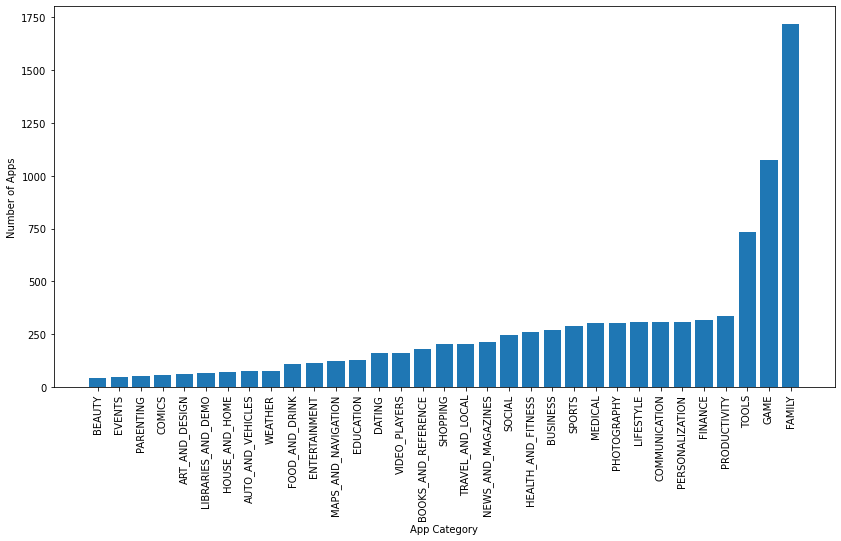

In [8]:
# Plot App category and the total number of apps which fall into that category
app_categories = apps['Category'].value_counts().sort_values()
fig, ax = plt.subplots(figsize = (14,7))

ax.bar(app_categories.index,app_categories.values)
plt.xticks(rotation=90)
plt.xlabel('App Category')
plt.ylabel('Number of Apps')
plt.show()

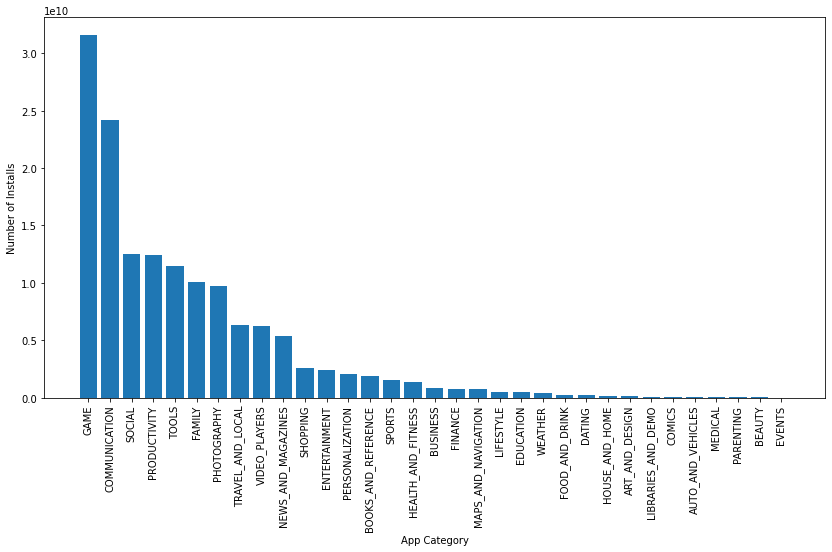

In [9]:
# Plot App Category vs Number of Installs
fig, ax = plt.subplots(figsize = (14,7))
app_category_installs = apps.groupby('Category').sum().sort_values('Installs',ascending=False)
ax.bar(app_category_installs.index,app_category_installs.Installs)
plt.xticks(rotation=90)
plt.xlabel('App Category')
plt.ylabel('Number of Installs')
plt.show()

In [10]:
# Average App Rating in each Category
avg_rating = apps.groupby('Category')['Rating'].mean()
print(avg_rating)

Category
ART_AND_DESIGN         4.377049
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.347458
BUSINESS               4.102593
COMICS                 4.155172
COMMUNICATION          4.151466
DATING                 3.971698
EDUCATION              4.375969
ENTERTAINMENT          4.136036
EVENTS                 4.435556
FAMILY                 4.191264
FINANCE                4.127445
FOOD_AND_DRINK         4.164151
GAME                   4.281285
HEALTH_AND_FITNESS     4.261450
HOUSE_AND_HOME         4.164706
LIBRARIES_AND_DEMO     4.179688
LIFESTYLE              4.096066
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.182450
NEWS_AND_MAGAZINES     4.128505
PARENTING              4.300000
PERSONALIZATION        4.333117
PHOTOGRAPHY            4.182895
PRODUCTIVITY           4.201796
SHOPPING               4.251485
SOCIAL                 4.254918
SPORTS                 4.225175
TOOLS                  4.047203
TRAVEL_AND_LOCAL       4.094146

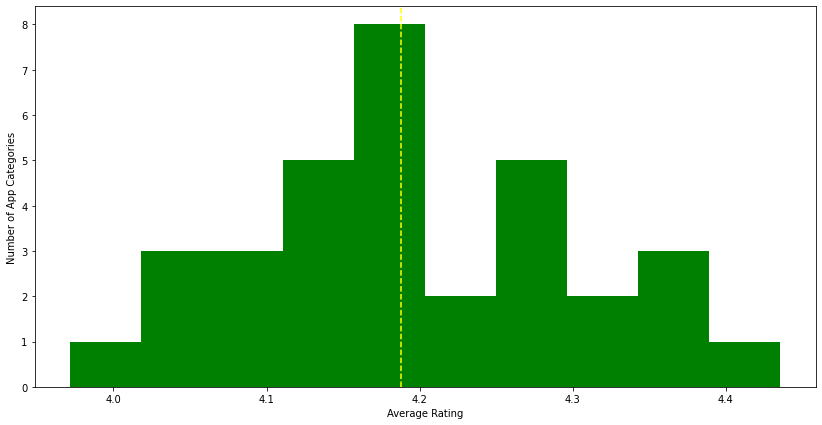

In [11]:
# Plot a histogram for Average Rating
fig, ax = plt.subplots(figsize = (14,7))
ax.hist(avg_rating,color='green')
ax.axvline(apps['Rating'].mean(),color='yellow',linestyle='--')
plt.xlabel('Average Rating')
plt.ylabel('Number of App Categories')
plt.show()

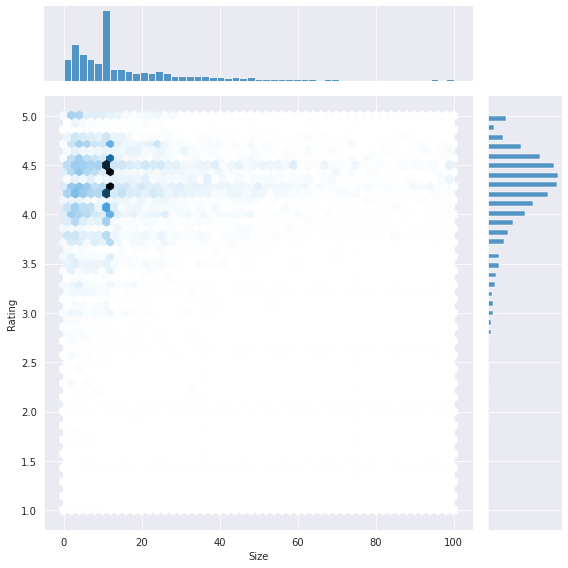

In [12]:
# Visualize the relation between Size and Rating of the App
%matplotlib inline
sns.set_style("darkgrid")

sns.jointplot(x = apps['Size'], y = apps['Rating'], height=8, kind='hex')
plt.show()

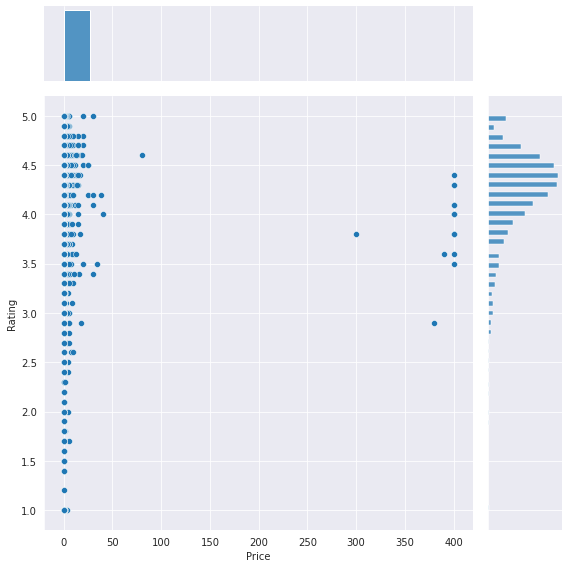

In [13]:
# Visualize the relation between Price and Rating of the App
%matplotlib inline

sns.jointplot(x = apps['Price'], y = apps['Rating'], height=8)
plt.show()

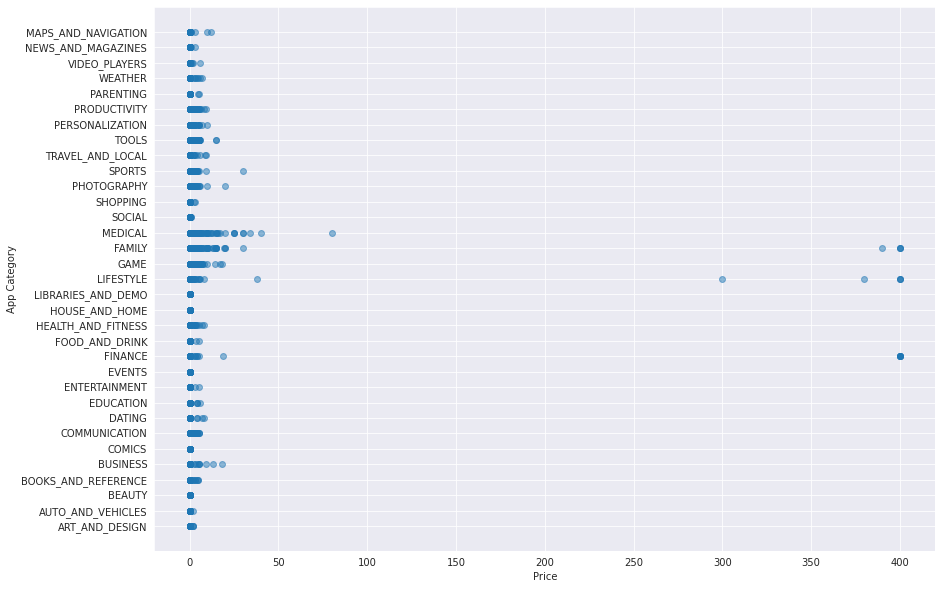

In [14]:
# Plot App Price vs App Category
%matplotlib inline
fig,ax = plt.subplots(figsize=(14,10))

plt.scatter(x=apps['Price'], y=apps['Category'], alpha=0.5)
plt.xlabel('Price')
plt.ylabel('App Category')
plt.show()

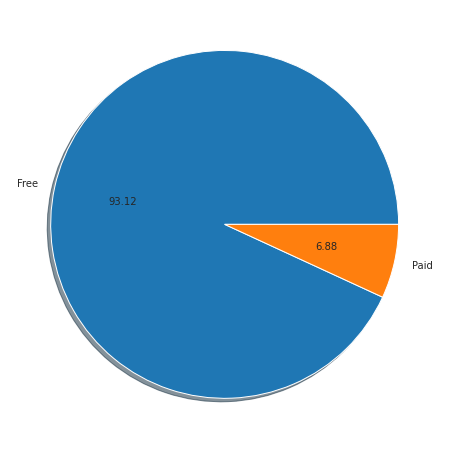

In [15]:
# Plot the popularity of Paid Apps vs Free Apps
fig,ax1 = plt.subplots(figsize=(12,8))
freevspaid = apps.groupby('Type').size()
plt.pie(freevspaid,labels=['Free','Paid'],shadow=True,autopct='%.2f')
plt.show()

##Sentiment Analysis

In [17]:
# Load and clean the User Reviews Dataset
reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Play Store App Review Analysis - Kapeesh Varma/User Reviews.csv')
reviews.dropna(inplace=True)

In [18]:
# Merge 'reviews' DataFrame with 'apps' DataFrame. We use inner join to do this operation.
mergedf = pd.merge(apps, reviews, on='App', how = 'inner')
mergedf.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


In [19]:
# Print Summary of the merged DataFrame
mergedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59124 entries, 0 to 59123
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     59124 non-null  object        
 1   Category                59124 non-null  object        
 2   Rating                  59124 non-null  float64       
 3   Reviews                 59124 non-null  object        
 4   Size                    59124 non-null  float64       
 5   Installs                59124 non-null  int64         
 6   Type                    59124 non-null  object        
 7   Price                   59124 non-null  float64       
 8   Content Rating          59124 non-null  object        
 9   Genres                  59124 non-null  object        
 10  Last Updated            59124 non-null  datetime64[ns]
 11  Current Ver             59124 non-null  object        
 12  Android Ver             59124 non-null  object

Sentiment
Positive    37523
Negative    15041
Neutral      6560
dtype: int64


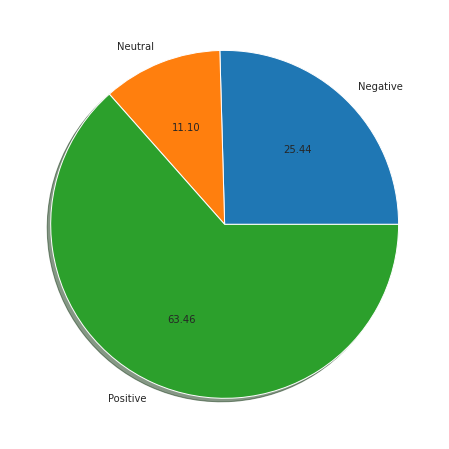

In [20]:
# Explore Composition of the total reviews
print(mergedf.value_counts('Sentiment'))

# Visualize the composition through a pie chart
fig,ax1 = plt.subplots(figsize=(12,8))
sentiments = mergedf.groupby('Sentiment').size()
plt.pie(sentiments,labels=['Negative','Neutral','Positive'],shadow=True,autopct='%.2f')
plt.show()

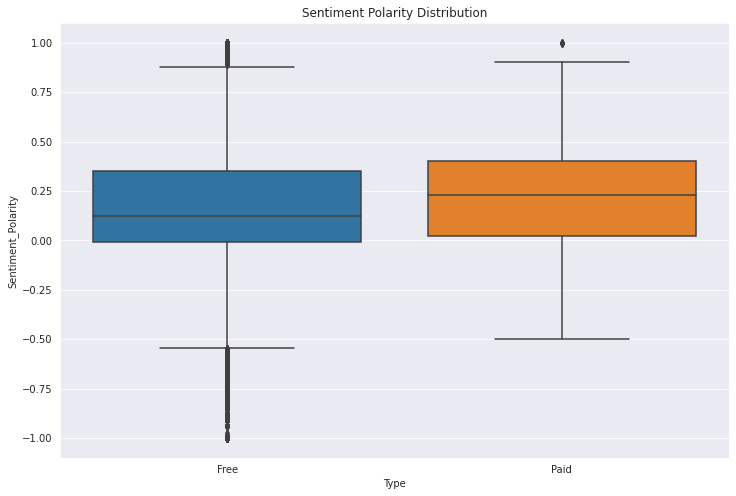

In [21]:
# Visualize the Sentiment Polarity Distribution for Free and Paid apps
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = mergedf)
ax.set_title('Sentiment Polarity Distribution')
plt.show()

##Conclusion

Hence, from the above observations and visualizations, we can draw the following conclusions:

1.   **The most popular App Category is "Game"**.

2.   **A large number of Apps fall into "Family" Category i.e., this is the category with highest number of subsequent apps**.

1.   **The total average rating of Play Store Apps is [4.18]**.

2.   **The App Categories with least and highest average ratings are "Dating" and "Events" respectively**.

1.   **Free apps are highly popular when compared to Paid apps**.

2.   **Most of the apps receive Positive reviews i.e., about 63.5%. Free apps might have a broader range of reviews than Paid apps but the median of Sentiment Polarity is higher in Paid apps**.